# Torch basics

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import numpy as np

In [2]:
torch.__version__

'1.5.0+cu101'

Largely inspired from the tutorial [What is PyTorch?](https://pytorch.org/tutorials/beginner/former_torchies/tensor_tutorial.html)

Tensors are used to encode the signal to process, but also the internal states and parameters of models.

Manipulating data through this constrained structure allows to use CPUs and GPUs at peak performance.



## Tensors

Construct a 3x5 matrix, uninitialized:

In [0]:
# Sets the default floating point dtype. 
# This type will be used as default floating point type for type inference in torch.tensor().
torch.set_default_tensor_type('torch.FloatTensor') 

In [4]:
x = torch.empty(3,5)
print(x.type())
print(x)

torch.FloatTensor
tensor([[1.6606e-35, 0.0000e+00, 3.3631e-44, 0.0000e+00,        nan],
        [0.0000e+00, 1.1578e+27, 1.1362e+30, 7.1547e+22, 4.5828e+30],
        [1.2121e+04, 7.1846e+22, 9.2198e-39, 7.0374e+22, 0.0000e+00]])


In [5]:
x = torch.randn(3,5)
print(x)

tensor([[ 0.7307, -0.1070,  0.6416,  0.2062, -0.3901],
        [-0.6680,  0.9241,  0.4242, -0.1721, -0.6571],
        [-1.2163, -0.9682,  1.2214, -0.1376,  0.1078]])


In [6]:
print(x.size())

torch.Size([3, 5])


torch.Size is in fact a [tuple](https://docs.python.org/3/tutorial/datastructures.html#tuples-and-sequences), so it supports the same operations.

In [7]:
x.size()[1]

5

In [8]:
x.size() == (3,5)

True

Importance of the brackets when defining a tensor

In [9]:
a = torch.tensor([2.0])
print(type(a))
print(a.dtype)
print(a.size())

b = torch.tensor(2.0)
print(type(b))
print(b.dtype)
print(b.size())

<class 'torch.Tensor'>
torch.float32
torch.Size([1])
<class 'torch.Tensor'>
torch.float32
torch.Size([])


Select some columns

In [10]:
cols = torch.zeros(5, dtype=torch.bool)
print(cols)
cols[1] = True
cols[4] = True
print(cols)
c = x[:, cols]  # selects all rows, 4th column and  5th column from a
print(c)

tensor([False, False, False, False, False])
tensor([False,  True, False, False,  True])
tensor([[-0.1070, -0.3901],
        [ 0.9241, -0.6571],
        [-0.9682,  0.1078]])


All operations on the tensor that operate in-place on it will have an _ postfix. 

In [11]:
# x will be filled with the value 3.5
x.fill_(3.5)
print(x)

tensor([[3.5000, 3.5000, 3.5000, 3.5000, 3.5000],
        [3.5000, 3.5000, 3.5000, 3.5000, 3.5000],
        [3.5000, 3.5000, 3.5000, 3.5000, 3.5000]])


## Bridge to numpy

In [12]:
y = x.numpy()
print(y)

[[3.5 3.5 3.5 3.5 3.5]
 [3.5 3.5 3.5 3.5 3.5]
 [3.5 3.5 3.5 3.5 3.5]]


In [13]:
a = np.ones(5)
b = torch.from_numpy(a)
print(b)
 

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [14]:
xr = torch.randn(3, 5)
a = np.ones(5).astype(int)
b = torch.from_numpy(a)
print(xr)
print(b)

tensor([[ 0.4542,  0.1754, -0.0622, -0.6777, -0.3007],
        [ 0.3431, -0.5162, -1.5766,  1.1187,  0.5464],
        [-0.0619,  0.1343,  1.4393,  0.6656, -0.3027]])
tensor([1, 1, 1, 1, 1])


### Question: print the type of the content (data) of variables a, b and xr

In [0]:
# COMPLETE THE CELL
# ...

## Operations

There are multiple syntaxes for operations. In the following
example, we will take a look at the addition operation.

Addition: syntax 1

In [16]:
x = torch.rand(5, 3) 
y = torch.rand(5, 3)
print(x + y)

tensor([[0.4940, 1.5534, 0.9714],
        [1.5305, 1.5431, 0.9653],
        [0.9274, 1.0833, 1.0865],
        [0.4058, 0.4745, 1.0851],
        [1.1196, 1.8290, 1.0088]])


Addition: syntax 2

In [17]:
print(torch.add(x, y))

tensor([[0.4940, 1.5534, 0.9714],
        [1.5305, 1.5431, 0.9653],
        [0.9274, 1.0833, 1.0865],
        [0.4058, 0.4745, 1.0851],
        [1.1196, 1.8290, 1.0088]])


Addition: providing an output tensor as argument

In [18]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[0.4940, 1.5534, 0.9714],
        [1.5305, 1.5431, 0.9653],
        [0.9274, 1.0833, 1.0865],
        [0.4058, 0.4745, 1.0851],
        [1.1196, 1.8290, 1.0088]])


Addition: in-place

In [19]:
# adds x to y
y.add_(x)
print(y)

tensor([[0.4940, 1.5534, 0.9714],
        [1.5305, 1.5431, 0.9653],
        [0.9274, 1.0833, 1.0865],
        [0.4058, 0.4745, 1.0851],
        [1.1196, 1.8290, 1.0088]])


**Note:** Any operation that mutates a tensor in-place is post-fixed with an ``_``.
    For example: ``x.copy_(y)``, ``x.t_()``, will change ``x``.



Any operation that mutates a tensor in-place is post-fixed with an ```_```

For example: ```x.copy_(y)```, ```x.t_()```, will change ```x```.

In [20]:
print(x.t())

tensor([[0.2338, 0.6979, 0.3759, 0.3582, 0.5833],
        [0.7699, 0.9401, 0.6465, 0.3723, 0.8417],
        [0.5318, 0.2236, 0.5788, 0.3893, 0.5269]])


In [21]:
print(x)

tensor([[0.2338, 0.7699, 0.5318],
        [0.6979, 0.9401, 0.2236],
        [0.3759, 0.6465, 0.5788],
        [0.3582, 0.3723, 0.3893],
        [0.5833, 0.8417, 0.5269]])


In [22]:
x.t_()
print(x)

tensor([[0.2338, 0.6979, 0.3759, 0.3582, 0.5833],
        [0.7699, 0.9401, 0.6465, 0.3723, 0.8417],
        [0.5318, 0.2236, 0.5788, 0.3893, 0.5269]])


You can use standard NumPy-like indexing with all bells and whistles!

In [23]:
print(x[:, 1])

tensor([0.6979, 0.9401, 0.2236])


Resizing (very useful): If you want to resize/reshape tensor, you can use ``torch.view``:

In [24]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


If you have a one element tensor, use ``.item()`` to get the value as a
Python number

In [25]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([0.2693])
0.26926329731941223


**Read later:**


  100+ Tensor operations, including transposing, indexing, slicing,
  mathematical operations, linear algebra, random numbers, etc.,
  are described
  [here](https://pytorch.org/docs/torch).

## 3D Tensors

### Question: What is the size of the following tensor?

In [26]:
y = torch.tensor([
     [
       [1, 2, 3],
       [4, 5, 6]
     ],
     [
       [1, 2, 3],
       [4, 5, 6]
     ],
     [
       [1, 2, 3],
       [4, 5, 6]
     ]
   ])
print(y)

tensor([[[1, 2, 3],
         [4, 5, 6]],

        [[1, 2, 3],
         [4, 5, 6]],

        [[1, 2, 3],
         [4, 5, 6]]])


In [0]:
# COMPLETE THE CELL
# ...

### Question: Explain the result of the next cell

In [28]:
torch.sum(y, dim=0)

tensor([[ 3,  6,  9],
        [12, 15, 18]])

## Broadcasting semantics

In short, if a PyTorch operation supports broadcast, then its Tensor arguments can be automatically expanded to be of equal sizes (without making copies of the data).

Two tensors are “broadcastable” if the following rules hold:

*   Each tensor has at least one dimension.
*   When iterating over the dimension sizes, **starting at the trailing dimension**, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.

If two tensors x, y are “broadcastable”, the resulting tensor size is calculated as follows:
* If the number of dimensions of x and y are not equal, prepend 1 to the dimensions of the tensor with fewer dimensions to make them equal length.
* Then, for each dimension size, the resulting dimension size is the max of the sizes of x and y along that dimension.

More details [here](https://pytorch.org/docs/stable/notes/broadcasting.html)



In [29]:
# can line up trailing dimensions to make reading easier
x=torch.empty(5,1,4,1)
y=torch.empty(  3,1,1)
print((x+y).size())



torch.Size([5, 3, 4, 1])


In [30]:
# but not necessary:
x=torch.empty(1)
y=torch.empty(3,1,7)
print((x+y).size())



torch.Size([3, 1, 7])


### Question: The following command does not work. Why?



In [31]:
x=torch.empty(5,2,4,1)
y=torch.empty(  3,1,1)
print((x+y).size())


RuntimeError: ignored

In [32]:
x=2*torch.ones(  2,4)
y=torch.ones(3,2,4)
print(x+y)

tensor([[[3., 3., 3., 3.],
         [3., 3., 3., 3.]],

        [[3., 3., 3., 3.],
         [3., 3., 3., 3.]],

        [[3., 3., 3., 3.],
         [3., 3., 3., 3.]]])


### Question: What is the diffence between "x = xr" and "x = xr.clone()"? 

In [33]:
x = xr.clone()
x.add_(-xr)
print(x)
print(xr)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
tensor([[ 0.4542,  0.1754, -0.0622, -0.6777, -0.3007],
        [ 0.3431, -0.5162, -1.5766,  1.1187,  0.5464],
        [-0.0619,  0.1343,  1.4393,  0.6656, -0.3027]])


Also be careful, changing the torch tensor modify the numpy array and vice-versa...

In [34]:
y=torch.ones(2,4)
print(y)
z = y.numpy()
print(z)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [35]:
np.add(z, 1, out=z)
print("z=", z)
print("y=", y,"\n")
torch.add(y, -4, out=y)
print("z=",z)
print("y=",y)

z= [[2. 2. 2. 2.]
 [2. 2. 2. 2.]]
y= tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.]]) 

z= [[-2. -2. -2. -2.]
 [-2. -2. -2. -2.]]
y= tensor([[-2., -2., -2., -2.],
        [-2., -2., -2., -2.]])


## Computational graphs

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch

In [37]:
!pip install torchviz

In [0]:
import torchviz

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[0.1140]], requires_grad=True)
tensor([[2.1140, 2.1140],
        [2.1140, 2.1140]], grad_fn=<AddBackward0>)


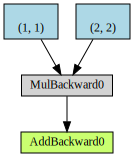

In [39]:
x = torch.ones(2, 2, requires_grad=True)
w = torch.rand(1, 1, requires_grad=True)
print(x)
print(w)
y = w * x + 2
print(y)
torchviz.make_dot(y)


## Playing with pytorch: linear regression

Code for plotting the surface

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def plot_figs(fig_num, elev, azim, x, y, weights, bias):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, elev=elev, azim=azim)
    ax.scatter(x[:, 0], x[:, 1], y)
    ax.plot_surface(np.array([[0, 0], [1, 1]]),
                    np.array([[0, 1], [0, 1]]),
                    (np.dot(np.array([[0, 0, 1, 1],[0, 1, 0, 1]]).T, weights) + bias)
                    .reshape((2, 2)),alpha=.5)
    ax.set_xlabel('x_1')
    ax.set_ylabel('x_2')
    ax.set_zlabel('y')
    
def plot_views(x, y, w, b):
    # Generate the different figures from different views
    elev = 43.5
    azim = -110
    plot_figs(1, elev, azim, x, y, w, b[0])

    plt.show()

Code for generating the 2D points

In [41]:
#Data generation (2D points)
w_source = torch.tensor([2., -3.], dtype=torch.float).view(-1,1)
b_source = torch.tensor([1.], dtype=torch.float)
x = torch.empty(30, 2).uniform_(0, 1) # input of the regression model
y = torch.matmul(x,w_source)+b_source # output of the regression model

print(w_source.shape)
print(b_source.shape)
print(x.shape)
print(y.shape)

torch.Size([2, 1])
torch.Size([1])
torch.Size([30, 2])
torch.Size([30, 1])


Plot the dataset

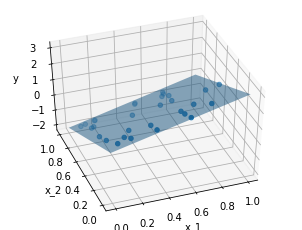

In [42]:
plot_views(x.numpy(), y.numpy(), w_source.numpy(), b_source.numpy())

In [43]:
# randomly initialize learnable weights and bias
w_t_init = torch.empty(2, 1).uniform_(-1, 1) 
b_t_init = torch.empty(1, 1).uniform_(-1, 1)

print("Initial values of the parameters:")
print(w_t_init) 
print(b_t_init)



Initial values of the parameters:
tensor([[-0.6527],
        [-0.5070]])
tensor([[-0.3934]])


### Question: calculate the gradient of the loss and code it.

Criterion to minimize:

$$
J(w_t,b_t)=\sum_{i=1}^{30}{(\hat{y}_i-y_i)}^2=\sum_{i=1}^{30}{(x_iw_t+b_t-y_i)}^2={\parallel x w_t+b_t 1_{30}-y\parallel}^2
$$

Gradient:

$$
\frac{\partial J(w_t,b_t)}{\partial w_t}=2x^Txw_t+2x^T 1_{30} b_t-2x^T y=2x^T(xw_t+1_{30} b_t-y)
$$

$$
\frac{\partial J(w_t,b_t)}{\partial b_t}=2\sum_{i=1}^{30}{(x_iw_t+b_t-y_i)}
$$

In [0]:
# our model forward pass
def forward_t(x):
    return x.mm(w_t)+b_t

# Loss function
def loss_t(x, y):
    y_pred = forward_t(x)
    return (y_pred - y).pow(2).sum()

# compute gradient
def gradient_t(x, y):  # d_loss/d_w, d_loss/d_c
    return 2*torch.mm(torch.t(x),x.mm(w_t)+b_t - y), 2*(x.mm(w_t)+b_t - y).sum()
    



Main loop for computing the estimate (gradient descent)

### Question: code the gradient descent algorithm within the main loop.

In [45]:
learning_rate = 1e-2

w_t = w_t_init.clone()
b_t = b_t_init.clone()

for epoch in range(10):
    l = loss_t(x,y)
    grad_w, grad_b = gradient_t(x,y)
    w_t = w_t - learning_rate*grad_w
    b_t = b_t - learning_rate*grad_b
    print("progress:", "epoch:", epoch, "loss",l)

progress: epoch: 0 loss tensor(78.2804)
progress: epoch: 1 loss tensor(34.2729)
progress: epoch: 2 loss tensor(30.3590)
progress: epoch: 3 loss tensor(27.2327)
progress: epoch: 4 loss tensor(24.4322)
progress: epoch: 5 loss tensor(21.9199)
progress: epoch: 6 loss tensor(19.6659)
progress: epoch: 7 loss tensor(17.6439)
progress: epoch: 8 loss tensor(15.8298)
progress: epoch: 9 loss tensor(14.2023)


In [46]:
# After training
print("Estimation of the parameters:")
print(w_t)
print(b_t)

Estimation of the parameters:
tensor([[ 0.6812],
        [-1.2830]])
tensor([[0.6206]])


### Question: Test a higger learning rate (e.g., learning_rate = 1). Explain what you observe.

In [47]:
learning_rate = 1

w_t = w_t_init.clone()
b_t = b_t_init.clone()

for epoch in range(10):
    l = loss_t(x,y)
    grad_w, grad_b = gradient_t(x,y)
    w_t = w_t - learning_rate*grad_w
    b_t = b_t - learning_rate*grad_b
    print("progress:", "epoch:", epoch, "loss",l)

progress: epoch: 0 loss tensor(78.2804)
progress: epoch: 1 loss tensor(319124.3750)
progress: epoch: 2 loss tensor(2.4995e+09)
progress: epoch: 3 loss tensor(1.9619e+13)
progress: epoch: 4 loss tensor(1.5400e+17)
progress: epoch: 5 loss tensor(1.2088e+21)
progress: epoch: 6 loss tensor(9.4882e+24)
progress: epoch: 7 loss tensor(7.4477e+28)
progress: epoch: 8 loss tensor(5.8459e+32)
progress: epoch: 9 loss tensor(4.5887e+36)


### Question: How to improve the quality of the estimate?